
# Decision Trees & Random Forest

### Table of Contents

1. [Dataset Description](#titanic)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Feature Engineering](#fe)
5. [Decision Tree](#dt)
     - 5.1 [Training Decision Tree Model](#tdt)
     - 5.2 [Predictions from Decision Tree Model](#pdt)
     - 5.3 [Evaluating the Decision Tree Model](#edt)
     - 5.4 [Parameter Tuning](#ptdt)
6. [Random Forest](#rf)
     - 6.1 [Training Random Forest Model](#trf)
     - 6.2 [Predictions from Random Forest Model](#prf)
     - 6.3 [Evaluating the Random Forest Model](#erf)
7. [Appendix](#appendix)

## Telecom Dataset  

### 1. Dataset Description  <a id='titanic'>

The dataset provided is from a telecom company which has a record of customer information and their churn.  <br>
Our goal is to predict the customers who might stop using their services.  <br>

**Column Description :** <br>
- Customer ID : Unique ID of customer
- gender : Two categories Male and Female
- Senior Citizen : Two categories 0 or 1
- Partner : Yes or No
- Dependents : Yes or No
- tenure : How long have they been with the company
- Phone Service : Yes or No
- Multiple Lines : Yes, No or No phone service
- Internet Service : DSL, Fiber Optics or No
- Online Security : Yes, No or No internet service 
- Online Backup : Yes, No or No internet service
- Device Protection : Yes, No or No internet service
- Tech Support : Yes, No or No internet service
- Streaming TV : Yes, No or No internet service
- Streaming Movies : Yes, No or No internet service
- Contract : Month-to-month, One year, Two year
- Paperless Biling : Yes or No
- Payment Method : Electronic check, Mailed check, Bank Transfer(automatic), Credit Card(automatic)
- Monthly Charges : Numeric value 
- Total Charges : Numeric value
- Churn : Yes or No



### 2. Importing the packages and dataset  <a id='packages'>

In [4]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
# Importing the train and test datasets
telco_df = pd.read_excel("Telco-Customer-Churn.xlsx")

### 3. Exploring the dataset  <a id='explore'>

In [7]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There are 7043 rows and 21 columns. <br>
There are only 3 numeric features and the rest are all categorical. 


In [9]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values.

**Descriptive Statistics**

In [10]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There is a lot of difference in standard deviations. We would need to scale the features. But Tree models do not need feature scaling

In [11]:
corr = telco_df.corr()

In [12]:
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


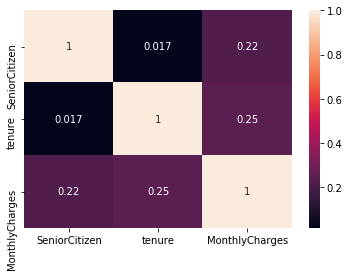

In [13]:
sns.heatmap(corr, annot=True)

There is absolutely no correlation between any 2 variables.

In [14]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Exploratory Data Analysis**

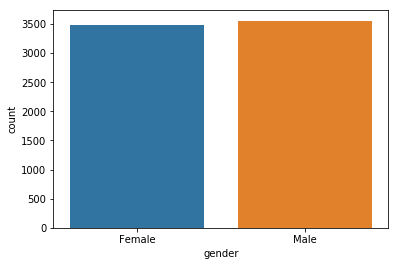

In [15]:
sns.countplot(x='gender', data=telco_df)

C:\Users\Avinash\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


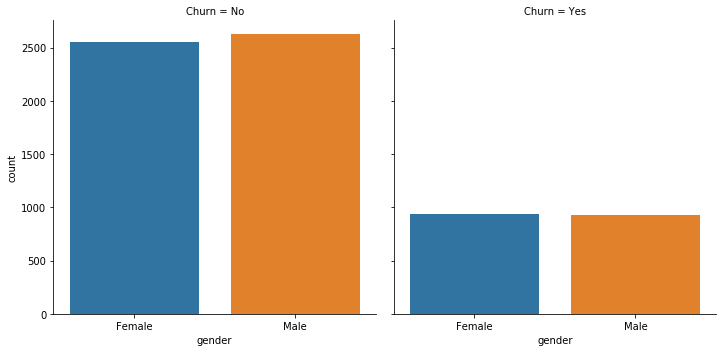

In [16]:
sns.factorplot(x='gender', col='Churn', kind='count', data=telco_df);

No relation between gender and churn

C:\Users\Avinash\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


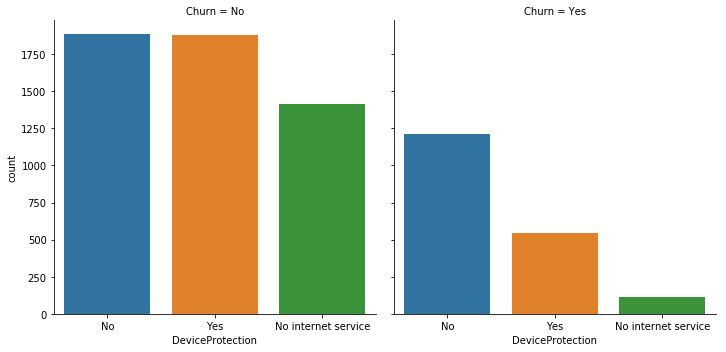

In [17]:
sns.factorplot(x='DeviceProtection', col='Churn', kind='count', data=telco_df);

Please who use DeviceProtection have less churn.

C:\Users\Avinash\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


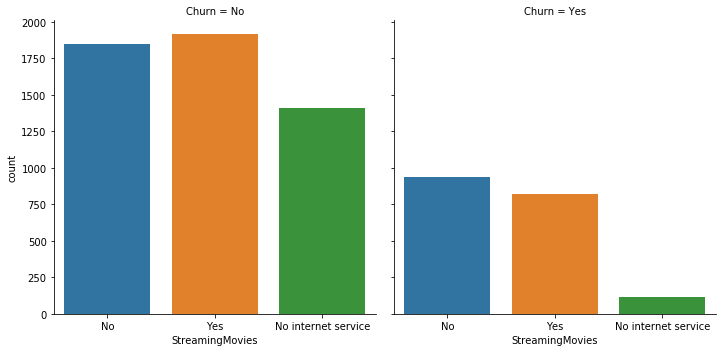

In [18]:
sns.factorplot(x='StreamingMovies', col='Churn', kind='count', data=telco_df);

C:\Users\Avinash\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


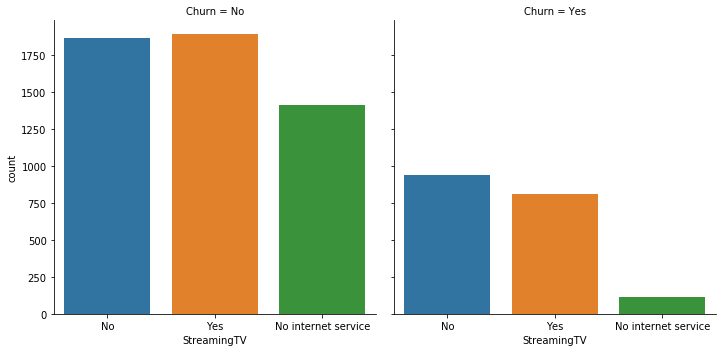

In [19]:
sns.factorplot(x='StreamingTV', col='Churn', kind='count', data=telco_df);

C:\Users\Avinash\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


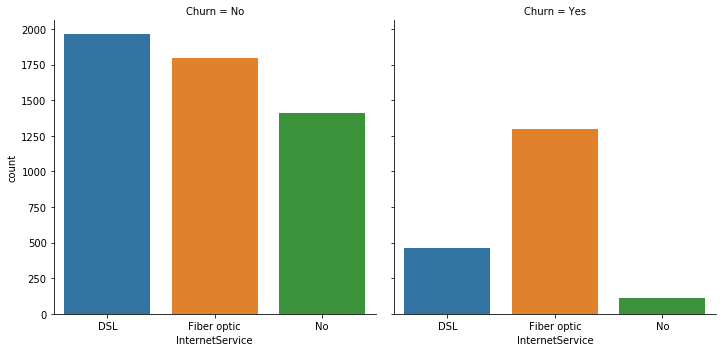

In [20]:
sns.factorplot(x='InternetService', col='Churn', kind='count', data=telco_df);

More Fiber optic InternetService users are leaving.

### 4. Feature Engineering  <a id='fe'>

In [21]:
telco_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The dataset is imbalanced.

Lets separate the categorical and numeric columns.

In [22]:
cat_df = telco_df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
cat_df.shape

(7043, 16)

Dummification of categorical columns.

In [23]:
cat_cols = pd.get_dummies(cat_df, drop_first=True)
cat_cols.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [24]:
cat_cols.shape

(7043, 27)

In [25]:
num_df = telco_df.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis=1)
num_df.shape

(7043, 5)

In [26]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID        7043 non-null object
SeniorCitizen     7043 non-null int64
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


Merging dummified and categorical columns.

In [27]:
dataset = pd.concat([num_df,cat_cols], axis=1 )

In [28]:
dataset.shape

(7043, 32)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                 

**Taking care of object dtype**

In [30]:
dataset['TotalCharges'][dataset['TotalCharges']==' ']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [31]:
dataset = dataset.drop(labels = list(dataset.TotalCharges[dataset.TotalCharges == " "].index))

In [32]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

## 5. Decision Tree  <a id='dt'>

In [33]:
y = dataset["Churn_Yes"].values

X = dataset.drop(['Churn_Yes','customerID'], axis=1)

In [34]:
# Stratified sampling

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101,stratify=y)

In [35]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=101, min_samples_leaf=3, class_weight="balanced")  #, class_weight="balanced"
my_tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

### 5.1 Training Decision Tree Model   <a id=tdt>

In [36]:
# Fit the decision tree model on your features and label

my_tree_one = my_tree_one.fit(X_train, y_train)

In [37]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(X_train.columns,my_tree_one.feature_importances_))

[('SeniorCitizen', 0.0),
 ('tenure', 0.0),
 ('MonthlyCharges', 0.0814628292870132),
 ('TotalCharges', 0.01866862457835374),
 ('gender_Male', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_Fiber optic', 0.12441593937320512),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No internet service', 0.0),
 ('StreamingTV_Yes', 0.0),
 ('StreamingMovies_No internet service', 0.0),
 ('StreamingMovies_Yes', 0.0),
 ('Contract_One year', 0.28030027287483444),
 ('Contract_Two year', 0.4830502656776943),
 ('PaperlessBilling_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0),
 ('P

In [38]:
# The accuracy of the model on Train data

print(my_tree_one.score(X_train, y_train))

0.6480577372107833


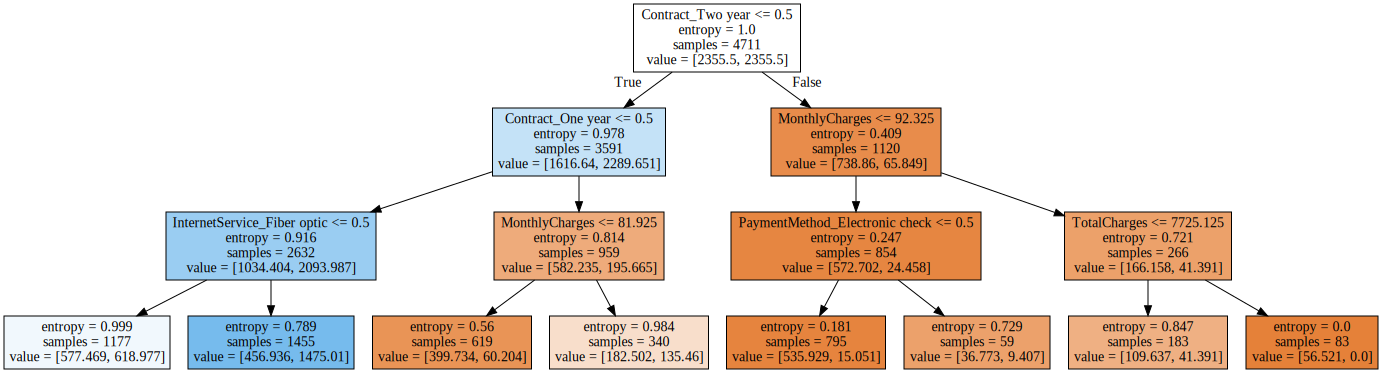

In [39]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=X_train.columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

### 5.2. Predictions of Decision Tree model   <a id= pdt>

In [40]:
y_pred = my_tree_one.predict(X_test)

### 5.3. Evaluation of Decision Tree  <a id=edt>

In [41]:
#Print Confusion matrix on Train Data
from sklearn.metrics import confusion_matrix, classification_report

pred = my_tree_one.predict(X_test)
df_confusion = confusion_matrix(y_test, pred)
df_confusion

array([[1003,  701],
       [  75,  542]], dtype=int64)

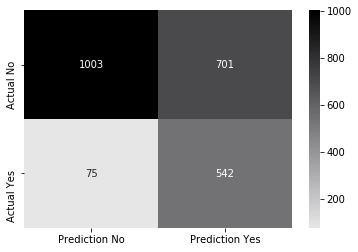

In [42]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [43]:
# Remove few features and train

### 5.4 Parameter Tuning   <a id='ptdt'>

#### What happen when we change the tree depth?

In [44]:
# Setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two

my_tree_two = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 101, class_weight='balanced')
my_tree_two = my_tree_two.fit(X_train, y_train)

#Print the score of both the decision tree

print("New Decision Tree Accuracy: ",my_tree_two.score(X_train, y_train))
print("Original Decision Tree Accuracy",my_tree_one.score(X_train,y_train))

New Decision Tree Accuracy:  0.8212693695606028
Original Decision Tree Accuracy 0.6480577372107833


We have improved our model by fine tuning the parameters. This is called hyperparameters tuning.

In [45]:
# Making predictions on our Train Data 

pred = my_tree_two.predict(X_train)

In [46]:
# Building confusion matrix of our improved model

df_confusion_new = confusion_matrix(y_train, pred)
df_confusion_new

array([[2711,  748],
       [  94, 1158]], dtype=int64)

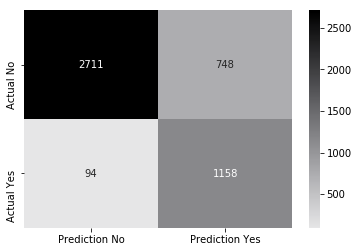

In [47]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_new, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

## 6. Random Forest   <a id=rf>

In [48]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, max_depth = 10, random_state = 101, class_weight="balanced")

### 6.1. Training Random Forest Model  <a id=trf>

In [49]:
# Fitting the model on Train Data

my_forest = forest.fit(X_train, y_train)

In [50]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(X_train, y_train))

0.8643600084907663


### 6.2. Prediction from Random Forest Model   <a id=prf>

In [51]:
# Making predictions

pred = my_forest.predict(X_test)

In [52]:
list(zip(X_train.columns,my_forest.feature_importances_))

[('SeniorCitizen', 0.012829865834181753),
 ('tenure', 0.17914653208806716),
 ('MonthlyCharges', 0.11153119432339997),
 ('TotalCharges', 0.1594678166843687),
 ('gender_Male', 0.015274451343721691),
 ('Partner_Yes', 0.014393022486429412),
 ('Dependents_Yes', 0.014423843828840386),
 ('PhoneService_Yes', 0.004981501862278838),
 ('MultipleLines_No phone service', 0.004442885105699701),
 ('MultipleLines_Yes', 0.013023318241122479),
 ('InternetService_Fiber optic', 0.06326311598292479),
 ('InternetService_No', 0.012462696575068169),
 ('OnlineSecurity_No internet service', 0.007612841824523231),
 ('OnlineSecurity_Yes', 0.02537725060429006),
 ('OnlineBackup_No internet service', 0.008293871867859926),
 ('OnlineBackup_Yes', 0.018710960305272355),
 ('DeviceProtection_No internet service', 0.016411095066306253),
 ('DeviceProtection_Yes', 0.011249890956788734),
 ('TechSupport_No internet service', 0.013968654023295128),
 ('TechSupport_Yes', 0.0335347857012708),
 ('StreamingTV_No internet service', 

### 6.3 Evaluation of Random Forest Model  <a id=erf>

In [53]:
df_confusion_rf = confusion_matrix(y_test, pred)
df_confusion_rf

array([[1378,  326],
       [ 188,  429]], dtype=int64)

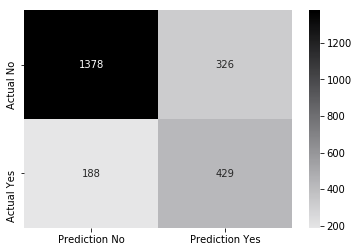

In [54]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### 7. Appendix  <a id = 'appendix'>

**Grid Search**

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.
Apply Grid Search on a Decision Tree Model to identify combination of optimal parameters. 

In [55]:
# Different parameters we want to test

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [56]:
# Importing GridSearch

from sklearn.model_selection import GridSearchCV

In [58]:
# Building the model

my_tree_three = tree.DecisionTreeClassifier(class_weight="balanced")

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

In [59]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
# Best accuracy score

grid.best_score_

0.7304181702398641

In [61]:
# Best parameters for the model

grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [66]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 10, random_state=42, class_weight="balanced")

In [67]:
my_tree_three.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [68]:
# Accuracy Score for new model

my_tree_three.score(X_train,y_train)

0.8246656760772659

**Observation:** Our accuracy score improve from 0.73 to 0.82

**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [69]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [70]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [72]:
forest_two = RandomForestClassifier(class_weight="balanced")

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [73]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.6s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 10.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

A Random Forest model built with this hyperparameters will provide best accuracy

In [75]:
rf_random.best_score_

0.7970706856293781

**Observation:** The original Random forest algorithm gave 0.87 accuracy whereas after Randomized Grid Search we got only 0.79. This is the best random combination of parameters the algorithm has choosen which produced the highest accuracy.

### The End